## 1. Data reading

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/zhichaoweng/Desktop/iris.csv', header = None)

data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2. Data visualization

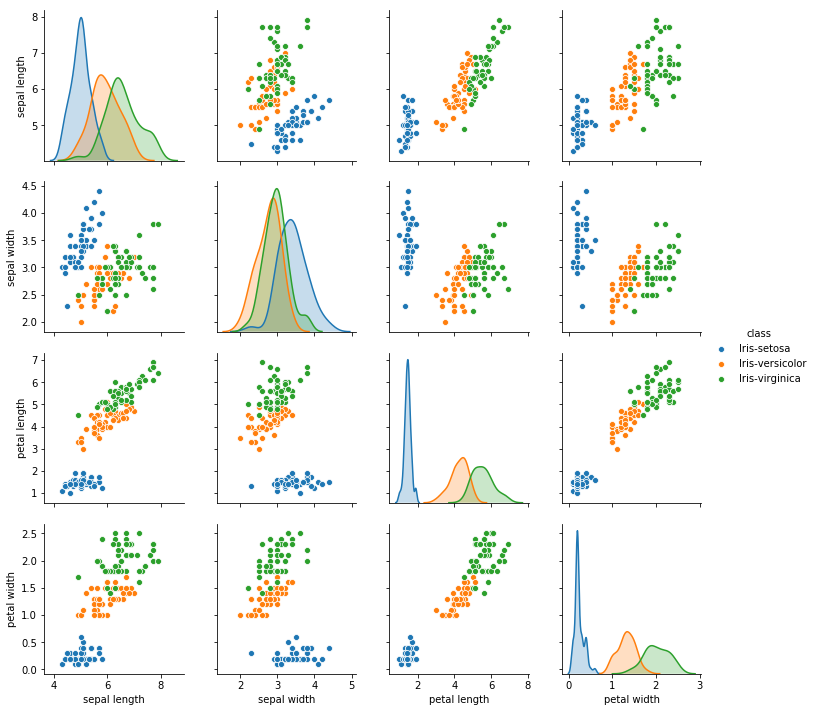

In [32]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data, hue = 'class')

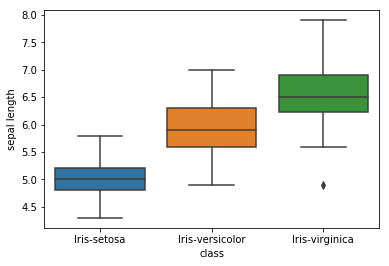

In [25]:
sns.boxplot(x = 'class', y = 'sepal length', data = data)

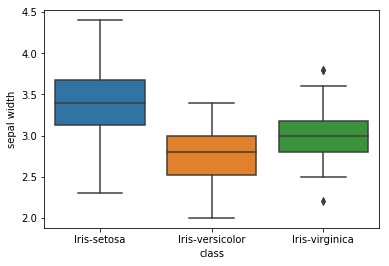

In [26]:
sns.boxplot(x = 'class', y = 'sepal width', data = data)

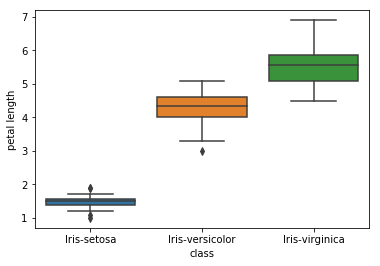

In [27]:
sns.boxplot(x = 'class', y = 'petal length', data = data)

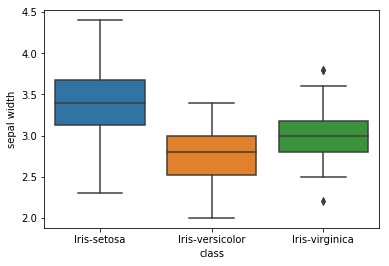

In [28]:
sns.boxplot(x = 'class', y = 'sepal width', data = data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f9d4ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1f92c668>]], dtype=object)

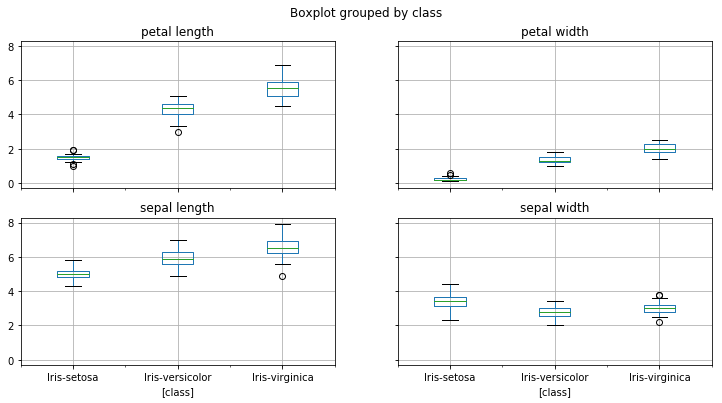

In [30]:
# boxplot using pandas
data.boxplot(by = 'class', figsize = (12,6))

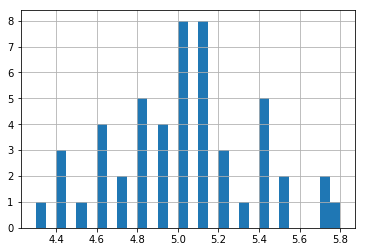

In [44]:
a = data['class'] == 'Iris-setosa'
a1 = data[a]
a1['sepal length'].hist(bins = 30)

In [32]:
#check if there's any NaN in the data set
data.isnull().any() 

sepal length    False
sepal width     False
petal length    False
petal width     False
class           False
dtype: bool

## 2. Data preprocessing

In [47]:
X = data[['petal length', 'petal width', 'sepal length', 'sepal width']]
y1 = data['class']
print(X.head())
print(y1.head())

   petal length  petal width  sepal length  sepal width
0           1.4          0.2           5.1          3.5
1           1.4          0.2           4.9          3.0
2           1.3          0.2           4.7          3.2
3           1.5          0.2           4.6          3.1
4           1.4          0.2           5.0          3.6
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object


In [48]:
y1.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

In [60]:
# replace the label with number, which is easy for classification
# Iris-setosa:      0
# Iris-versicolor:  1
# Iris-verginica:   2
y = []
for i in range(len(y1)):
    if y1[i] == 'Iris-setosa':
        y.append(0)
    elif y1[i] == 'Iris-versicolor':
        y.append(1)
    else: y.append(2)
y[:5]     

[0, 0, 0, 0, 0]

In [59]:
from collections import Counter
Counter(y)

Counter({0: 50, 1: 50, 2: 50})

In [96]:
from sklearn.preprocessing import StandardScaler
scc = StandardScaler()
X_sc = scc.fit_transform(X)
print(X.shape)


(150, 4)


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [101]:
X.head()

,petal length,petal width,sepal length,sepal width
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6


## 3. Check feature correlations heatmap

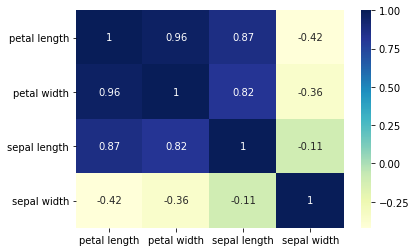

In [128]:
sns.heatmap(X.corr(), annot = True, cmap = "YlGnBu")

Correlation between petal width and length is high; between sepal width and length is low

## 4. ML model training

### a. SVM

In [102]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, jaccard_similarity_score, r2_score
svcm = SVC(kernel = 'rbf')
svcm.fit(X_train, y_train)
ypred = svcm.predict(X_test)
print("Accuracy Score: ", accuracy_score(ypred, y_test))
print("F1 Score: ", f1_score(ypred, y_test, average = "weighted"))
print("Jaccard Similarity Score: ", jaccard_similarity_score(ypred, y_test))
print("R2 Score: ", r2_score(ypred, y_test))

Accuracy Score:  0.973684210526
F1 Score:  0.973684210526
Jaccard Similarity Score:  0.973684210526
R2 Score:  0.962635201573


### b. Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
ypred = reg.predict(X_test)
print("Accuracy Score: ", accuracy_score(ypred, y_test))
print("F1 Score: ", f1_score(ypred, y_test, average = "weighted"))
print("Jaccard Similarity Score: ", jaccard_similarity_score(ypred, y_test))
print("R2 Score: ", r2_score(ypred, y_test))

Accuracy Score:  1.0
F1 Score:  1.0
Jaccard Similarity Score:  1.0
R2 Score:  1.0


### c. k-NN

In [111]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 10)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print("Accuracy Score: ", accuracy_score(ypred, y_test))
print("F1 Score: ", f1_score(ypred, y_test, average = "weighted"))
print("Jaccard Similarity Score: ", jaccard_similarity_score(ypred, y_test))
print("R2 Score: ", r2_score(ypred, y_test))

Accuracy Score:  0.973684210526
F1 Score:  0.973684210526
Jaccard Similarity Score:  0.973684210526
R2 Score:  0.962635201573


### d. Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 3, max_depth = 10)
dtc.fit(X_train, y_train)
ypred = dtc.predict(X_test)
print("Accuracy Score: ", accuracy_score(ypred, y_test))
print("F1 Score: ", f1_score(ypred, y_test, average = "weighted"))
print("Jaccard Similarity Score: ", jaccard_similarity_score(ypred, y_test))
print("R2 Score: ", r2_score(ypred, y_test))

Accuracy Score:  0.973684210526
F1 Score:  0.973684210526
Jaccard Similarity Score:  0.973684210526
R2 Score:  0.962635201573


### e. Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 30)
rfc.fit(X_train, y_train)
ypred = rfc.predict(X_test)
print("Accuracy Score: ", accuracy_score(ypred, y_test))
print("F1 Score: ", f1_score(ypred, y_test, average = "weighted"))
print("Jaccard Similarity Score: ", jaccard_similarity_score(ypred, y_test))
print("R2 Score: ", r2_score(ypred, y_test))

Accuracy Score:  0.947368421053
F1 Score:  0.947368421053
Jaccard Similarity Score:  0.947368421053
R2 Score:  0.921810699588


## 5. Feature selection

In [129]:
X_train.head()

,petal length,petal width,sepal length,sepal width
111,5.3,1.9,6.4,2.7
68,4.5,1.5,6.2,2.2
128,5.6,2.1,6.4,2.8
82,3.9,1.2,5.8,2.7
22,1.0,0.2,4.6,3.6


In [136]:
X_train_p = X_train[['petal length', 'petal width']]
X_train_s = X_train[['sepal length', 'sepal width']]
X_train_ps = X_train[['petal length', 'petal width', 'sepal length']] # only drop the feature "sepal width" as this featur has low correlation with all other features
X_test_p = X_test[['petal length', 'petal width']]
X_test_s = X_test[['sepal length', 'sepal width']]
X_test_ps = X_test[['petal length', 'petal width', 'sepal length']]

### a. SVM

In [146]:
svcm = SVC(kernel = 'rbf')
svcm.fit(X_train_p, y_train)
ypredp = svcm.predict(X_test_p)

svcm.fit(X_train_s, y_train)
ypreds = svcm.predict(X_test_s)

svcm.fit(X_train_ps, y_train)
ypredps = svcm.predict(X_test_ps) 
print("Accuracy Score for Petal data: ", accuracy_score(ypredp, y_test))
print("Accuracy Score for sepal data: ", accuracy_score(ypreds, y_test))
print("Accuracy Score for sepal data / petal data: ", accuracy_score(ypredps, y_test))

Accuracy Score for Petal data:  0.973684210526
Accuracy Score for sepal data:  0.763157894737
Accuracy Score for sepal data / petal data:  0.973684210526


### b. Logistic Regression

In [145]:
reg = LogisticRegression()
reg.fit(X_train_p, y_train)
ypredp = reg.predict(X_test_p)

reg.fit(X_train_s, y_train)
ypreds = reg.predict(X_test_s)

reg.fit(X_train_ps, y_train)
ypredps = reg.predict(X_test_ps)
print("Accuracy Score for Petal data: ", accuracy_score(ypredp, y_test))
print("Accuracy Score for sepal data: ", accuracy_score(ypreds, y_test))
print("Accuracy Score for sepal data / petal data: ", accuracy_score(ypredps, y_test))

Accuracy Score for Petal data:  0.868421052632
Accuracy Score for sepal data:  0.736842105263
Accuracy Score for sepal data / petal data:  0.973684210526


### c. k-NN

In [144]:
clf = KNeighborsClassifier(n_neighbors = 10)
clf.fit(X_train_p, y_train)
ypredp = clf.predict(X_test_p)

clf.fit(X_train_s, y_train)
ypreds = clf.predict(X_test_s)

clf.fit(X_train_ps, y_train)
ypredps = clf.predict(X_test_ps)
print("Accuracy Score for Petal data: ", accuracy_score(ypredp, y_test))
print("Accuracy Score for sepal data: ", accuracy_score(ypreds, y_test))
print("Accuracy Score for sepal data / petal data: ", accuracy_score(ypredps, y_test))

Accuracy Score for Petal data:  0.973684210526
Accuracy Score for sepal data:  0.763157894737
Accuracy Score for sepal data / petal data:  0.973684210526


### d. Decision Tree

In [143]:
dtc = DecisionTreeClassifier(random_state = 3, max_depth = 10)
dtc.fit(X_train_p, y_train)
ypredp = dtc.predict(X_test_p)

dtc.fit(X_train_s, y_train)
ypreds = dtc.predict(X_test_s)

dtc.fit(X_train_ps, y_train)
ypredps = dtc.predict(X_test_ps)
print("Accuracy Score for Petal data: ", accuracy_score(ypredp, y_test))
print("Accuracy Score for sepal data: ", accuracy_score(ypreds, y_test))
print("Accuracy Score for sepal data / petal data: ", accuracy_score(ypredps, y_test))

Accuracy Score for Petal data:  0.947368421053
Accuracy Score for sepal data:  0.631578947368
Accuracy Score for sepal data / petal data:  0.947368421053


### e. Random Forest

In [142]:
rfc = RandomForestClassifier(n_estimators = 30)
rfc.fit(X_train_p, y_train)
ypredp = rfc.predict(X_test_p)

rfc.fit(X_train_s, y_train)
ypreds = rfc.predict(X_test_s)

rfc.fit(X_train_ps, y_train)
ypredps = rfc.predict(X_test_ps)
print("Accuracy Score for Petal data: ", accuracy_score(ypredp, y_test))
print("Accuracy Score for sepal data: ", accuracy_score(ypreds, y_test))
print("Accuracy Score for sepal data / petal data: ", accuracy_score(ypredps, y_test))

Accuracy Score for Petal data:  0.947368421053
Accuracy Score for sepal data:  0.657894736842
Accuracy Score for sepal data / petal data:  0.921052631579


## 6. Conclusion

a. the data is trained better without feature scaling as the scaling could decrease the accuracy


b. of all the models used (SVM, Logistic Regression, Decision Tree, Random Forest and k-NN), the best classifier for this case if Logistic Regression which can yield the accuracy of 1.0


c. from the correlation heatmap, it can be seen that the feature "sepal width" has low correlation with all the other features


d. drop the "sepal width" feature can increase the model accuracy